
# 📚 Forecasting Youth Literacy in Palestine (Ages 15–24)
This project uses AI (Facebook Prophet) to forecast literacy rates for Palestinian youth from 2024 to 2030. It includes interactive visualizations, chart exports, and GPT-style insights to support humanitarian education efforts.


Saving Percent_of_Population_15_24_Literate.xlsx to Percent_of_Population_15_24_Literate (6).xlsx


### 📄 Uploaded Data Preview

,Year,Palestine_15_24_avg
0,1997,97.30
1,2000,98.70
2,2001,98.90
3,2002,98.85
4,2003,98.85


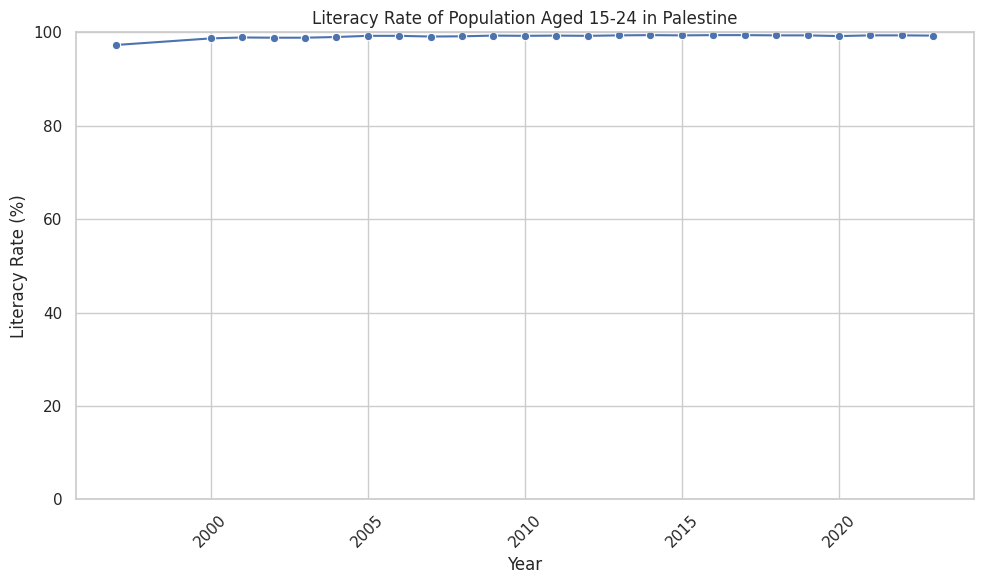

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnd27zo93/rz_7d2j4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnd27zo93/0szabbqt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76005', 'data', 'file=/tmp/tmpnd27zo93/rz_7d2j4.json', 'init=/tmp/tmpnd27zo93/0szabbqt.json', 'output', 'file=/tmp/tmpnd27zo93/prophet_modelhz0u0nf8/prophet_model-20250714014140.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:41:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:41:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:18

## 📅 Select a Future Year to View Prediction:

interactive(children=(Dropdown(description='Select Year:', options=(2024, 2025, 2026, 2027, 2028, 2029), style…

## 🧠 Auto-Generated Literacy Insights (2024–2030):

• 📉 In 2024, literacy plateaued around 99.30%.

• 📉 In 2025, literacy plateaued around 99.29%.

• 📉 In 2026, literacy plateaued around 99.29%.

• 📉 In 2027, literacy plateaued around 99.29%.

• 📉 In 2028, literacy plateaued around 99.28%.

• 📉 In 2029, literacy plateaued around 99.28%.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
# 🔧 Step 1: Install required libraries
!pip install openpyxl prophet --quiet

# 💡 Project Introduction
from IPython.display import Markdown, display
display(Markdown("""
# 📚 Forecasting Youth Literacy in Palestine (Ages 15–24)
This project uses AI (Facebook Prophet) to forecast literacy rates for Palestinian youth from 2024 to 2030. It includes interactive visualizations, chart exports, and GPT-style insights to support humanitarian education efforts.
"""))

# 📂 Step 2: Upload the Excel file
from google.colab import files
uploaded = files.upload()

# 📊 Step 3: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import ipywidgets as widgets
import zipfile
import os

# 📈 Step 4: Load and preview the data
filename = list(uploaded.keys())[0]
df = pd.read_excel(filename)
display(Markdown("### 📄 Uploaded Data Preview"))
display(df.head())

# 🎨 Step 5: Plot the existing data
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Palestine_15_24_avg', marker='o')
plt.title('Literacy Rate of Population Aged 15-24 in Palestine')
plt.xlabel('Year')
plt.ylabel('Literacy Rate (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("historical_literacy_plot.png")
plt.show()

# 🧮 Step 6: Prepare the data for Prophet
df_prophet = df.rename(columns={'Year': 'ds', 'Palestine_15_24_avg': 'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')

# 🔮 Step 7: Train the Prophet model and forecast to 2030
model = Prophet(yearly_seasonality=False, daily_seasonality=False)
model.fit(df_prophet)
future = model.make_future_dataframe(periods=7, freq='Y')  # Forecast 2024–2030
forecast = model.predict(future)

# 📆 Step 8: Clean forecast output
forecast_filtered = forecast[['ds', 'yhat']].copy()
forecast_filtered['Year'] = forecast_filtered['ds'].dt.year
forecast_filtered = forecast_filtered[['Year', 'yhat']]
forecast_filtered.to_csv("forecasted_literacy.csv", index=False)

# 🧠 Step 9: Auto-generate bullet-style insights
insights = []
prev = None
for _, row in forecast_filtered.iterrows():
    year, pred = int(row['Year']), row['yhat']
    if prev is not None and year > df['Year'].max():
        change = pred - prev
        if abs(change) < 0.02:
            insights.append(f"• 📉 In {year}, literacy plateaued around {pred:.2f}%.")
        elif change > 0.1:
            insights.append(f"• 📈 In {year}, literacy increased noticeably to {pred:.2f}%.")
        elif change < -0.1:
            insights.append(f"• ⚠️ In {year}, literacy dropped to {pred:.2f}%.")
    prev = pred

# 🎛️ Step 10: Interactive forecast viewer
def show_prediction(year):
    result = forecast_filtered[forecast_filtered['Year'] == year]
    if not result.empty:
        value = result['yhat'].values[0]
        display(Markdown(f"### 🔮 Predicted Literacy Rate in {year}: **{value:.2f}%**"))

    # Plot the full forecast
    plt.figure(figsize=(10, 6))
    past_data = df[['Year', 'Palestine_15_24_avg']]
    future_data = forecast_filtered[forecast_filtered['Year'] > df['Year'].max()]

    plt.plot(past_data['Year'], past_data['Palestine_15_24_avg'], label='Actual', marker='o')
    plt.plot(future_data['Year'], future_data['yhat'], label='Forecast', linestyle='--', marker='o')

    selected = forecast_filtered[forecast_filtered['Year'] == year]
    if not selected.empty:
        plt.scatter(selected['Year'], selected['yhat'], color='red', s=100, label=f'{year} Prediction')

    plt.title('Literacy Rate Forecast (15–24 Age Group)')
    plt.xlabel('Year')
    plt.ylabel('Literacy Rate (%)')
    plt.ylim(95, 100)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    image_name = f"literacy_forecast_{year}.png"
    plt.savefig(image_name)
    plt.show()
    files.download(image_name)

dropdown = widgets.Dropdown(
    options=[year for year in forecast_filtered['Year'] if year > df['Year'].max()],
    description='Select Year:',
    style={'description_width': 'initial'},
)

display(Markdown("## 📅 Select a Future Year to View Prediction:"))
widgets.interact(show_prediction, year=dropdown)

# 📋 Step 11: Show all auto-generated insights
display(Markdown("## 🧠 Auto-Generated Literacy Insights (2024–2030):"))
for bullet in insights:
    display(Markdown(bullet))

# 🗃️ Step 12: Download forecast + chart + dataset + notebook
with zipfile.ZipFile("literacy_forecast_project.zip", "w") as zipf:
    zipf.write("forecasted_literacy.csv")
    zipf.write("historical_literacy_plot.png")
    zipf.write(filename)
    # Uncomment if you save notebook as `.ipynb`
    # zipf.write("Project1_AIFHG_YouthLiteracy.ipynb")

files.download("literacy_forecast_project.zip")

